In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [4]:
import torchvision
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST(root="MNIST_data/",
                                train=True,
                                transform = transforms.ToTensor(),
                                download=True)

test_dataset = torchvision.datasets.MNIST(root="MNIST_data/",
                                train = False,
                                transform = transforms.ToTensor(),
                                download=True)


In [5]:
batch_size = 128

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [6]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.linear = nn.Linear(784, 256)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.linear = nn.Linear(256, 784)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat



In [7]:
model = AutoEncoder().to(device)

In [8]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
criterion = nn.MSELoss()

In [10]:
sample = test_dataset[1051][0].view(-1,784).to(device)

Epoch: 1 / 31, cost : 0.0524464026093483


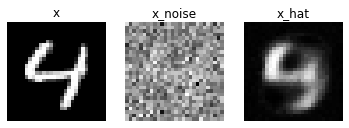

Epoch: 2 / 31, cost : 0.03580739349126816
Epoch: 3 / 31, cost : 0.03262031078338623
Epoch: 4 / 31, cost : 0.03127861022949219
Epoch: 5 / 31, cost : 0.030492136254906654
Epoch: 6 / 31, cost : 0.02996690198779106


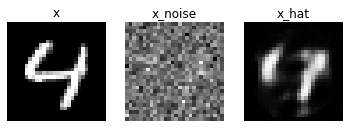

Epoch: 7 / 31, cost : 0.029555000364780426
Epoch: 8 / 31, cost : 0.02925126999616623
Epoch: 9 / 31, cost : 0.028981119394302368
Epoch: 10 / 31, cost : 0.02871953882277012
Epoch: 11 / 31, cost : 0.028557153418660164


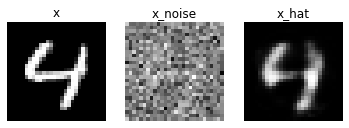

Epoch: 12 / 31, cost : 0.02842988446354866
Epoch: 13 / 31, cost : 0.02824495919048786
Epoch: 14 / 31, cost : 0.028099875897169113
Epoch: 15 / 31, cost : 0.028044000267982483
Epoch: 16 / 31, cost : 0.027925124391913414


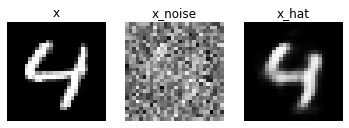

Epoch: 17 / 31, cost : 0.027788380160927773
Epoch: 18 / 31, cost : 0.02763771079480648
Epoch: 19 / 31, cost : 0.027633758261799812
Epoch: 20 / 31, cost : 0.027568204328417778
Epoch: 21 / 31, cost : 0.027483047917485237


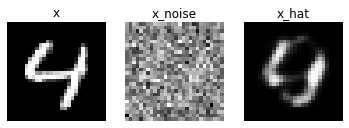

Epoch: 22 / 31, cost : 0.027351653203368187
Epoch: 23 / 31, cost : 0.027320699766278267
Epoch: 24 / 31, cost : 0.02727709338068962
Epoch: 25 / 31, cost : 0.02725072391331196
Epoch: 26 / 31, cost : 0.027166860178112984


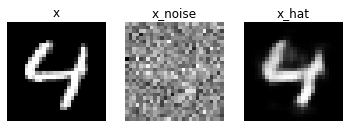

Epoch: 27 / 31, cost : 0.02711647003889084
Epoch: 28 / 31, cost : 0.027103843167424202
Epoch: 29 / 31, cost : 0.027036430314183235
Epoch: 30 / 31, cost : 0.027005130425095558
Epoch: 31 / 31, cost : 0.02691424824297428


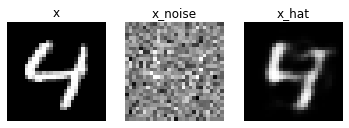

In [11]:
epochs = 31

model.train()
for epoch in range(epochs):
    model.train()
    avg_cost = 0
    total_batch_num = len(train_dataloader)

    for b_x, b_y in train_dataloader:
        b_x = b_x.view(-1, 784).to(device)
        noise = torch.randn(b_x.shape).to(device)
        noisy_b_x = b_x + noise

        z, b_x_hat = model.forward(noisy_b_x)
        loss = criterion(b_x_hat, b_x)

        avg_cost += loss / total_batch_num
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch + 1} / {epochs}, cost : {avg_cost}')

    # observe differences
    if epoch % 5 == 0:
        model.eval()
        fig, ax = plt.subplots(1, 3)
        with torch.no_grad():
            noise = torch.randn(sample.shape).to(device)
            noisy_sample = sample + noise
            test_z, test_output = model.forward(noisy_sample)

        ax[0].set_title('x')
        ax[1].set_title('x_noise')
        ax[2].set_title('x_hat')

        ax[0].set_axis_off()
        ax[1].set_axis_off()
        ax[2].set_axis_off()
        
        ax[0].imshow(np.reshape(sample.detach().cpu(), (28, 28)), cmap='gray')
        ax[1].imshow(np.reshape(noisy_sample.detach().cpu(), (28, 28)), cmap='gray')
        ax[2].imshow(np.reshape(test_output.detach().cpu(), (28, 28)), cmap='gray')
        plt.show()
        

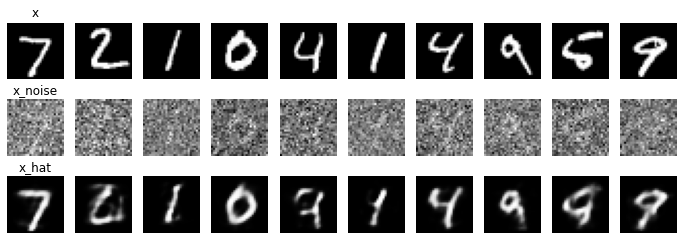

In [12]:
model.eval()
test_samples = torch.zeros((10, 28, 28))
for i in range(10):
    test_samples[i] = test_dataset[i][0]

noise = torch.randn(test_samples.shape)
noisy_test_samples = test_samples + noise

noisy_test_samples = noisy_test_samples.view(-1, 784).to(device)

z, test_output = model.forward(noisy_test_samples)

fig, ax = plt.subplots(3, 10, figsize=(12,4))

ax[0][0].set_title('x')
ax[1][0].set_title('x_noise')
ax[2][0].set_title('x_hat')

for i in range(10):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[2][i].set_axis_off()


    ax[0][i].imshow(np.reshape(test_samples[i].detach().cpu(), (28, 28)), cmap='gray')
    ax[1][i].imshow(np.reshape(noisy_test_samples[i].detach().cpu(), (28, 28)), cmap='gray')
    ax[2][i].imshow(np.reshape(test_output[i].detach().cpu(), (28, 28)), cmap='gray')
plt.show()
